In [5]:
#import libraries and data

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')


train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set  = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num','marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [6]:
train_set.shape,test_set.shape

((32561, 15), (16281, 15))

In [7]:
#view train and test data samples
train_set.sample(4,random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
14160,27,Private,160178,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
27048,45,State-gov,50567,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
28868,29,Private,185908,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,55,United-States,>50K
5667,30,Private,190040,Bachelors,13,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K


In [8]:
test_set.sample(4,random_state=42)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
13633,29,Private,189346,HS-grad,9,Never-married,Transport-moving,Unmarried,White,Male,0,0,40,United-States,<=50K.
1921,31,Private,137076,Bachelors,13,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,<=50K.
12140,52,Federal-gov,35546,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,<=50K.
9933,54,Local-gov,116428,10th,6,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K.


In [9]:
#checking for null values in train and test dataset
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [10]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [12]:
pd.DataFrame([train_set.dtypes,test_set.dtypes],index=['train_set','test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [15]:
#finding datacolumns with datatypes as object

for i in train_set.columns:
    if train_set[i].dtypes == 'object':
        print(i)


workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [18]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [19]:
train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
train_set.relationship.value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [21]:
train_set.workclass.nunique(),train_set.education.nunique(),train_set.marital_status.nunique(),train_set.native_country.nunique()

(9, 16, 7, 42)

In [29]:
X_train = train_set.copy()
X_test = test_set.copy()

In [30]:
X_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [32]:
#converting categorical columns into numerical columns

dict_sex={}
count = 0
for i in X_train.sex.unique():
    dict_sex[i]=count
    count+=1

In [33]:
dict_workclass={}
count = 0
for i in X_train.workclass.unique():
    dict_workclass[i]=count
    count+=1

In [35]:
dict_education={}
count = 0
for i in X_train.education.unique():
    dict_education[i]=count
    count+=1

In [36]:
dict_marital_status={}
count = 0
for i in X_train.marital_status.unique():
    dict_marital_status[i]=count
    count+=1

In [37]:
dict_occupation={}
count = 0
for i in X_train.occupation.unique():
    dict_occupation[i]=count
    count+=1

In [38]:
dict_relationship={}
count = 0
for i in X_train.relationship.unique():
    dict_relationship[i]=count
    count+=1

In [39]:
dict_race={}
count = 0
for i in X_train.race.unique():
    dict_race[i]=count
    count+=1

In [40]:
dict_native_country={}
count = 0
for i in X_train.native_country.unique():
    dict_native_country[i]=count
    count+=1

In [41]:
dict_wage_class={}
count = 0
for i in X_train.wage_class.unique():
    dict_wage_class[i]=count
    count+=1

In [42]:
dict_sex,dict_education,dict_wage_class,dict_native_country,dict_race,dict_occupation ,dict_marital_status 

({' Male': 0, ' Female': 1},
 {' Bachelors': 0,
  ' HS-grad': 1,
  ' 11th': 2,
  ' Masters': 3,
  ' 9th': 4,
  ' Some-college': 5,
  ' Assoc-acdm': 6,
  ' Assoc-voc': 7,
  ' 7th-8th': 8,
  ' Doctorate': 9,
  ' Prof-school': 10,
  ' 5th-6th': 11,
  ' 10th': 12,
  ' 1st-4th': 13,
  ' Preschool': 14,
  ' 12th': 15},
 {' <=50K': 0, ' >50K': 1},
 {' United-States': 0,
  ' Cuba': 1,
  ' Jamaica': 2,
  ' India': 3,
  ' ?': 4,
  ' Mexico': 5,
  ' South': 6,
  ' Puerto-Rico': 7,
  ' Honduras': 8,
  ' England': 9,
  ' Canada': 10,
  ' Germany': 11,
  ' Iran': 12,
  ' Philippines': 13,
  ' Italy': 14,
  ' Poland': 15,
  ' Columbia': 16,
  ' Cambodia': 17,
  ' Thailand': 18,
  ' Ecuador': 19,
  ' Laos': 20,
  ' Taiwan': 21,
  ' Haiti': 22,
  ' Portugal': 23,
  ' Dominican-Republic': 24,
  ' El-Salvador': 25,
  ' France': 26,
  ' Guatemala': 27,
  ' China': 28,
  ' Japan': 29,
  ' Yugoslavia': 30,
  ' Peru': 31,
  ' Outlying-US(Guam-USVI-etc)': 32,
  ' Scotland': 33,
  ' Trinadad&Tobago': 34,
  ' G

In [43]:
X_train['sex'] = X_train['sex'].map(dict_sex) 
X_train['education'] = X_train['education'].map(dict_education) 
X_train['wage_class'] = X_train['wage_class'].map(dict_wage_class) 
X_train['native_country'] = X_train['native_country'].map(dict_native_country)
X_train['race'] = X_train['race'].map(dict_race) 
X_train['occupation']=X_train['occupation'].map(dict_occupation) 
X_train['marital_status'] = X_train['marital_status'].map(dict_marital_status) 
X_train['workclass'] = X_train['workclass'].map(dict_workclass) 
X_train['relationship'] = X_train['relationship'].map(dict_relationship) 

In [44]:
 X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [45]:
Xtrain = X_train.astype(int)

In [46]:
 X_train.head() 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [47]:
X_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [48]:
# coverting test data categorical columns into numerical columns

dict_sex={}
count = 0
for i in X_test.sex.unique():
    dict_sex[i]=count
    count+=1

dict_workclass={}
count = 0
for i in X_test.workclass.unique():
    dict_workclass[i]=count
    count+=1

dict_education={}
count = 0
for i in X_test.education.unique():
    dict_education[i]=count
    count+=1
    
dict_marital_status={}
count = 0
for i in X_test.marital_status.unique():
    dict_marital_status[i]=count
    count+=1
    
dict_occupation={}
count = 0
for i in X_test.occupation.unique():
    dict_occupation[i]=count
    count+=1
    
    
dict_relationship={}
count = 0
for i in X_test.relationship.unique():
    dict_relationship[i]=count
    count+=1    

dict_race={}
count = 0
for i in X_test.race.unique():
    dict_race[i]=count
    count+=1
    
    
dict_native_country={}
count = 0
for i in X_test.native_country.unique():
    dict_native_country[i]=count
    count+=1
    
dict_wage_class={}
count = 0
for i in X_test.wage_class.unique():
    dict_wage_class[i]=count
    count+=1

In [49]:
dict_sex,dict_education,dict_wage_class,dict_native_country,dict_race,dict_occupation ,dict_marital_status 

({' Male': 0, ' Female': 1},
 {' 11th': 0,
  ' HS-grad': 1,
  ' Assoc-acdm': 2,
  ' Some-college': 3,
  ' 10th': 4,
  ' Prof-school': 5,
  ' 7th-8th': 6,
  ' Bachelors': 7,
  ' Masters': 8,
  ' Doctorate': 9,
  ' 5th-6th': 10,
  ' Assoc-voc': 11,
  ' 9th': 12,
  ' 12th': 13,
  ' 1st-4th': 14,
  ' Preschool': 15},
 {' <=50K.': 0, ' >50K.': 1},
 {' United-States': 0,
  ' ?': 1,
  ' Peru': 2,
  ' Guatemala': 3,
  ' Mexico': 4,
  ' Dominican-Republic': 5,
  ' Ireland': 6,
  ' Germany': 7,
  ' Philippines': 8,
  ' Thailand': 9,
  ' Haiti': 10,
  ' El-Salvador': 11,
  ' Puerto-Rico': 12,
  ' Vietnam': 13,
  ' South': 14,
  ' Columbia': 15,
  ' Japan': 16,
  ' India': 17,
  ' Cambodia': 18,
  ' Poland': 19,
  ' Laos': 20,
  ' England': 21,
  ' Cuba': 22,
  ' Taiwan': 23,
  ' Italy': 24,
  ' Canada': 25,
  ' Portugal': 26,
  ' China': 27,
  ' Nicaragua': 28,
  ' Honduras': 29,
  ' Iran': 30,
  ' Scotland': 31,
  ' Jamaica': 32,
  ' Ecuador': 33,
  ' Yugoslavia': 34,
  ' Hungary': 35,
  ' Hong'

In [50]:
X_test['sex'] = X_test['sex'].map(dict_sex) 
X_test['education'] = X_test['education'].map(dict_education) 
X_test['wage_class'] = X_test['wage_class'].map(dict_wage_class) 
X_test['native_country'] = X_test['native_country'].map(dict_native_country)
X_test['race'] = X_test['race'].map(dict_race) 
X_test['occupation']=X_test['occupation'].map(dict_occupation) 
X_test['marital_status'] = X_test['marital_status'].map(dict_marital_status) 
X_test['workclass'] = X_test['workclass'].map(dict_workclass) 
X_test['relationship'] = X_test['relationship'].map(dict_relationship) 

In [51]:
 X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [52]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,0,226802,0,7,0,0,0,0,0,0,0,40,0,0
1,38,0,89814,1,9,1,1,1,1,0,0,0,50,0,0
2,28,1,336951,2,12,1,2,1,1,0,0,0,40,0,1
3,44,0,160323,3,10,1,0,1,0,0,7688,0,40,0,1
4,18,2,103497,3,10,0,3,0,1,1,0,0,30,0,0


In [53]:
X_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,0.969351,1.894357e+05,4.084639,10.072907,1.116455,6.411768,1.584239,0.979485,0.332965,1081.905104,87.899269,40.392236,1.219151,0.236226
std,13.849187,1.707976,1.057149e+05,3.446229,2.567545,1.182208,3.302738,1.194189,0.496000,0.471289,7583.935968,403.105286,12.479332,4.963702,0.424776
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,1.167360e+05,1.000000,9.000000,0.000000,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,1.778310e+05,3.000000,10.000000,1.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,1.000000,2.383840e+05,7.000000,12.000000,1.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.490400e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,3770.000000,99.000000,40.000000,1.000000


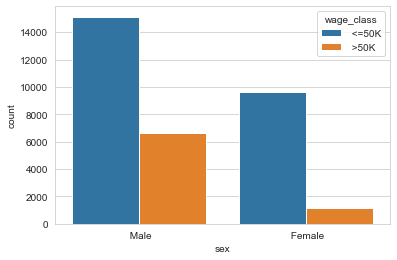

In [55]:
#Annual income visual analysis

plt.figure(figsize=(60,30))
sns.set_style('whitegrid')
%matplotlib inline
sns.countplot('sex',data = train_set,hue ="wage_class")

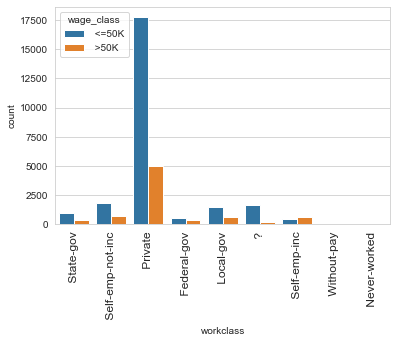

In [57]:
m = sns.countplot('workclass',data=train_set,hue='wage_class')
m.set_xticklabels(m.get_xticklabels(), rotation = 90, fontsize = 12) 
plt.show()

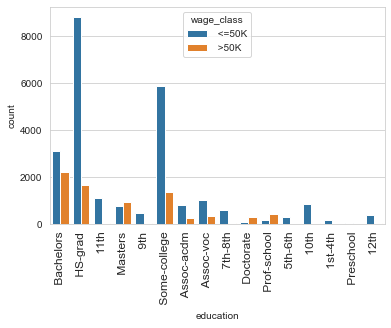

In [58]:
p = sns.countplot('education',data=train_set,hue='wage_class') 
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 12) 
plt.show()

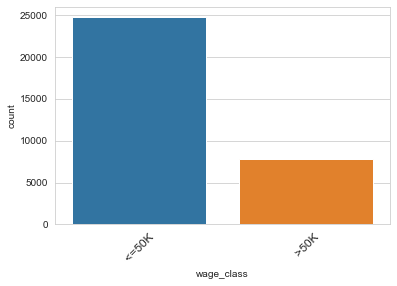

In [59]:
r = sns.countplot('wage_class',data=train_set) 
r.set_xticklabels(r.get_xticklabels(), rotation = 45, fontsize = 12) 
plt.show()

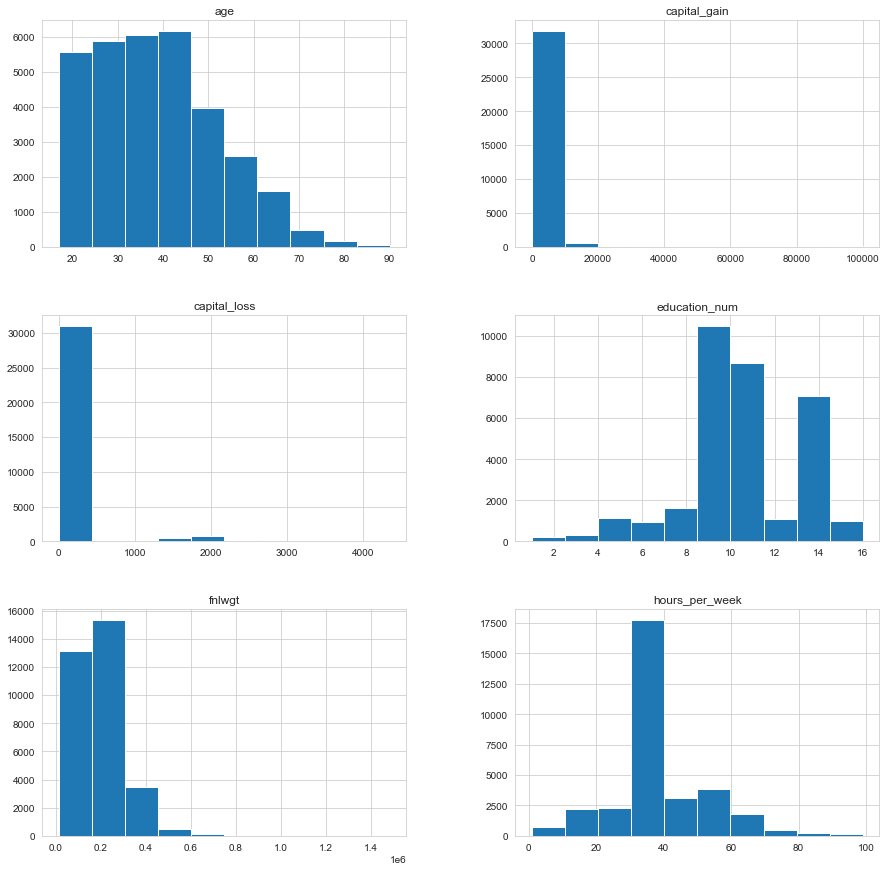

In [60]:
pd.DataFrame.hist(train_set,figsize = [15,15]) 
plt.show()

In [61]:
x_train = X_train.drop('wage_class',axis=1) 
y_train = X_train['wage_class']

In [62]:
x_test = X_test.drop('wage_class',axis=1) 
y_test = X_test['wage_class']

In [63]:
X = x_train.values 
Y = y_train.values 
Xtest = x_test.values
Ytest = y_test.values 
x_train.shape,y_train.shape,X.shape,Y.shape,Xtest.shape,Ytest.shape 

((32561, 14), (32561,), (32561, 14), (32561,), (16281, 14), (16281,))

In [64]:
Xtest

array([[    25,      0, 226802, ...,      0,     40,      0],
       [    38,      0,  89814, ...,      0,     50,      0],
       [    28,      1, 336951, ...,      0,     40,      0],
       ...,
       [    38,      0, 374983, ...,      0,     50,      0],
       [    44,      0,  83891, ...,      0,     40,      0],
       [    35,      6, 182148, ...,      0,     60,      0]], dtype=int64)

In [ ]:
#Using boosting method of ensemble model for predicting the annual income

In [66]:
from xgboost.sklearn import XGBClassifier 
#set the parameters for the xgbosst model 
params = { 
    'objective': 'binary:logistic', 
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': 1.0, 
    'n_estimators': 5 } 
params['eval_metric'] = ['logloss', 'auc']

In [67]:
#Train the XGBClassifier model

boost = XGBClassifier(**params).fit(X,Y)

[14:57:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [ ]:
#Predicting the annual income

In [68]:
preds = boost.predict(Xtest) 
preds 

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
preds_proba = boost.predict_proba(Xtest) 
preds_proba

array([[0.9862895 , 0.01371049],
       [0.4968602 , 0.5031398 ],
       [0.8749048 , 0.1250952 ],
       ...,
       [0.282     , 0.718     ],
       [0.28114867, 0.7188513 ],
       [0.282     , 0.718     ]], dtype=float32)

In [72]:
#Measure the accuracy of the model

correct = 0 
from sklearn.metrics import accuracy_score 
for i in range(len(preds)):
    if (y_test[i] == preds[i]):
        correct += 1

acc = accuracy_score(Ytest, preds)

print('Predicted correctly: {0}/{1}'.format(correct, len(preds)))
print('Accuracy Score :{:.4f}'.format(acc)) 
print('Error: {0:.4f}'.format(1-acc))
        

Predicted correctly: 13686/16281
Accuracy Score :0.8406
Error: 0.1594


In [73]:
from sklearn.metrics import classification_report 
print(classification_report(Ytest,preds)) 

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     12435
           1       0.75      0.49      0.59      3846

   micro avg       0.84      0.84      0.84     16281
   macro avg       0.80      0.72      0.75     16281
weighted avg       0.83      0.84      0.83     16281



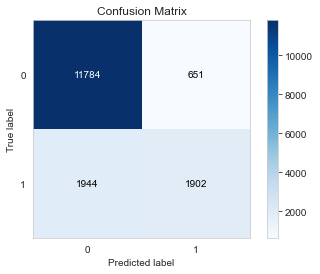

In [75]:
#Creating confusion matrix

import scikitplot 
scikitplot.metrics.plot_confusion_matrix(Ytest, preds) 

C:\Users\Pranita Kothawade\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


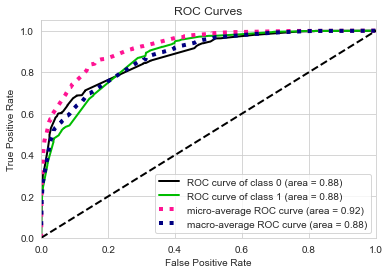

In [76]:
#creating ROC

scikitplot.metrics.plot_roc_curve(Ytest, preds_proba)

In [77]:
# comparing the ensemble model with single random logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
pred_lr = lr.predict(Xtest)
pred_lr

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [79]:
pred_lr_proba = lr.predict_proba(Xtest)
pred_lr_proba 

array([[0.7899404 , 0.2100596 ],
       [0.70432871, 0.29567129],
       [0.86477453, 0.13522547],
       ...,
       [0.8980355 , 0.1019645 ],
       [0.28761218, 0.71238782],
       [0.80980852, 0.19019148]])

In [80]:
acc = accuracy_score(Ytest, pred_lr)

print('Accuracy Score :{:.4f}'.format(acc)) 


Accuracy Score :0.7998


In [81]:
print(classification_report(Ytest,pred_lr)) 

              precision    recall  f1-score   support

           0       0.81      0.97      0.88     12435
           1       0.71      0.26      0.38      3846

   micro avg       0.80      0.80      0.80     16281
   macro avg       0.76      0.61      0.63     16281
weighted avg       0.78      0.80      0.76     16281



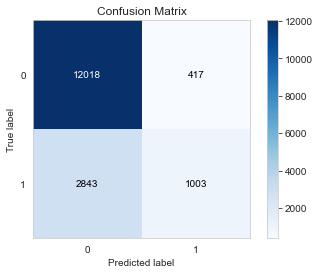

In [82]:
#Creating confusion matrix for logistic regression

import scikitplot 
scikitplot.metrics.plot_confusion_matrix(Ytest, pred_lr) 

C:\Users\Pranita Kothawade\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


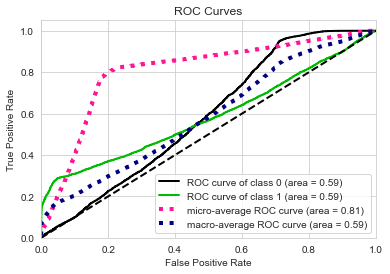

In [84]:
#creating ROC for logistic regression

scikitplot.metrics.plot_roc_curve(Ytest, pred_lr_proba)

In [85]:
# Using Bagging Method of Ensemble model and base model as Logistic Regression

from sklearn.ensemble import BaggingClassifier 
bagging_LR = BaggingClassifier(LogisticRegression(), 
                               n_estimators=10, 
                               max_samples=0.5, 
                               bootstrap=True, 
                               random_state=3) 



In [86]:
bagging_LR.fit(X,Y) 

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.5, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=3, verbose=0, warm_start=False)

In [89]:
#Predictions by the Bagging Ensemble model
bagging_preds = bagging_LR.predict(Xtest) 
bagging_preds 

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [90]:
bag_preds_proba = bagging_LR.predict_proba(Xtest) 
bag_preds_proba 

array([[0.77070977, 0.22929023],
       [0.70650743, 0.29349257],
       [0.84890371, 0.15109629],
       ...,
       [0.89050391, 0.10949609],
       [0.30716017, 0.69283983],
       [0.82077007, 0.17922993]])

In [ ]:
#Score of the bagging ensemble model

In [92]:
bagging_LR.score(Xtest,Ytest) 

0.798968122351207

In [93]:
print(accuracy_score(Ytest,bagging_preds))

0.798968122351207


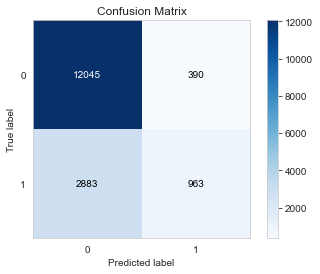

In [94]:
#Confusion matrix
scikitplot.metrics.plot_confusion_matrix(Ytest,bagging_preds) 

C:\Users\Pranita Kothawade\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


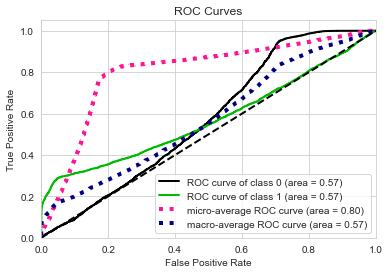

In [95]:
#ROC

scikitplot.metrics.plot_roc_curve(Ytest,bag_preds_proba)


In [97]:
# let's save the model
import pickle

with open('modelForPrediction.sav', 'wb') as f:
    pickle.dump(boost,f)